In [1]:
import numpy as np
import sys
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load some useful cartopy routines
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# and a new matplotlib routine
import matplotlib.path as mpath

In [3]:
## Import the ecco_v4_py library into Python
## =========================================
##    If ecco_v4_py is not installed in your local Python library,
##    tell Python where to find it.  The example below adds
##    ecco_v4_py to the user's path if it is stored in the folder
##    ECCOv4-py under the user's home directory

from os.path import join,expanduser
user_home_dir = expanduser('~')

sys.path.append(join(user_home_dir,'ECCOv4-py'))

import ecco_v4_py as ecco

In [4]:
## Set top-level file directory for the ECCO NetCDF files
## =================================================================

## currently set to ~/Downloads/ECCO_V4r4_PODAAC,
## the default if ecco_podaac_download was used to download dataset granules
ECCO_dir = join(user_home_dir,'Downloads','ECCO_V4r4_PODAAC')

In [5]:
#download the ECCO grid file

from ecco_download import *

ecco_podaac_download(ShortName="ECCO_L4_GEOMETRY_LLC0090GRID_V4R4",\
                    StartDate="2006-01-09",EndDate="2006-12-31",download_root_dir=None,\
                    n_workers=6,force_redownload=False)

created download directory /home/m267zhou/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_GEOMETRY_LLC0090GRID_V4R4
{'ShortName': 'ECCO_L4_GEOMETRY_LLC0090GRID_V4R4', 'temporal': '2006-01-09,2006-12-31'}

Total number of matching granules: 1

GRID_GEOMETRY_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading
DL Progress: 100%|########################| 1/1 [00:00<00:00, 12865.96it/s]

total downloaded: 0.0 Mb
avg download speed: 0.0 Mb/s


In [6]:
# download file (granule) containing 2000 velocities,
# to default path ~/Downloads/ECCO_V4r4_PODAAC/
vel_monthly_shortname = "ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4"
ecco_podaac_download(ShortName=vel_monthly_shortname,\
                    StartDate="2006-01-02",EndDate="2006-12-31",download_root_dir=None,\
                    n_workers=6,force_redownload=False)

created download directory /home/m267zhou/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4
{'ShortName': 'ECCO_L4_SSH_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2006-01-02,2006-12-31'}

Total number of matching granules: 12

SEA_SURFACE_HEIGHT_mon_mean_2006-01_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_mon_mean_2006-02_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_mon_mean_2006-03_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_mon_mean_2006-04_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_mon_mean_2006-05_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_mon_mean_2006-06_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

SEA_SURFACE_HEIGHT_mon_mean_2006-07_ECCO_V4r4_native_llc0090.

In [7]:
# download file (granule) containing 2000 velocities,
# to default path ~/Downloads/ECCO_V4r4_PODAAC/
vel_monthly_shortname = "ECCO_L4_OCEAN_VEL_LLC0090GRID_MONTHLY_V4R4"
ecco_podaac_download(ShortName=vel_monthly_shortname,\
                    StartDate="2006-01-02",EndDate="2006-12-31",download_root_dir=None,\
                    n_workers=6,force_redownload=False)

created download directory /home/m267zhou/Downloads/ECCO_V4r4_PODAAC/ECCO_L4_OCEAN_VEL_LLC0090GRID_MONTHLY_V4R4
{'ShortName': 'ECCO_L4_OCEAN_VEL_LLC0090GRID_MONTHLY_V4R4', 'temporal': '2006-01-02,2006-12-31'}

Total number of matching granules: 12

OCEAN_VELOCITY_mon_mean_2006-01_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_VELOCITY_mon_mean_2006-02_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_VELOCITY_mon_mean_2006-03_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_VELOCITY_mon_mean_2006-05_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_VELOCITY_mon_mean_2006-04_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_VELOCITY_mon_mean_2006-06_ECCO_V4r4_native_llc0090.nc already exists, and force=False, not re-downloading

OCEAN_VELOCITY_mon_mean_2006-07_ECCO_V4r4_native_llc0090.nc already exist

In [8]:
## Load the model grid
ecco_grid = xr.open_dataset(glob.glob(join(ECCO_dir,'*GEOMETRY*','*.nc'))[0])

## Load one year of 2D monthly data: SSH, UVEL, VVEL
ds_SSH = xr.open_mfdataset(join(ECCO_dir,'*SSH*MONTHLY*','*_2006-*.nc'))
ds_VEL = xr.open_mfdataset(join(ECCO_dir,'*OCEAN*VEL*MONTHLY*','*_2006-*.nc'))

## select only *surface* velocity components
ds_UVEL_SSS = ds_VEL.UVEL.isel(k=0)
ds_VVEL_SSS = ds_VEL.VVEL.isel(k=0)

## Copy ecco_ds from ecco_grid dataset
ecco_ds = ecco_grid.copy()
## Add SSH, UVEL, and VVEL variables to ecco_ds
ecco_ds['SSH'] = ds_SSH['SSH']
#ecco_ds['VEL'] = np.sqrt(ds_UVEL_SSS**2 + ds_VVEL_SSS**2)
ecco_ds['VVEL'] = ds_VVEL_SSS
ecco_ds['UVEL'] = ds_UVEL_SSS

## Load ecco_ds into memory
ecco_ds = ecco_ds.load()

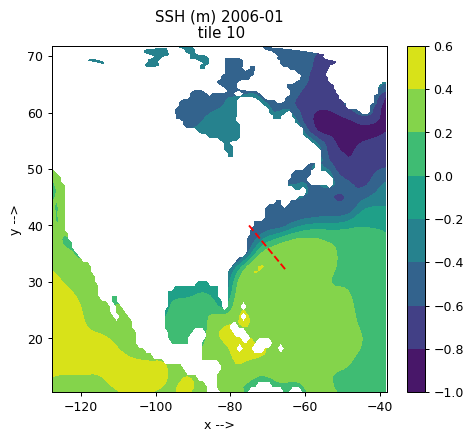

In [9]:
#plot SSH in tile 10
plt.figure(figsize=(6,5), dpi= 90)

# Step 1, select the tile to plot using the **.isel( )** syntax.
#tile_to_plot = ecco_ds.SSH.isel(tile=10, time=0)
#tile_to_plot = tile_to_plot.where(ecco_ds.hFacC.isel(tile=10,k=0) !=0, np.nan)

# Step 2, use plt.imshow()
plt.contourf(ecco_grid.XC.isel(tile=10), ecco_grid.YC.isel(tile=10), ecco_ds.SSH.isel(tile=10, time=0), origin='lower');

# Step 3, add colorbar, title, and x and y axis labels
plt.colorbar()
plt.title('SSH (m) ' + str(ecco_ds.time[0].values)[0:7] + '\n tile 10')
plt.xlabel('x -->')
plt.ylabel('y -->')

#add a line segment
point1 = [-75, 40]
point2 = [-65, 32]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, linestyle="--", color = "red")

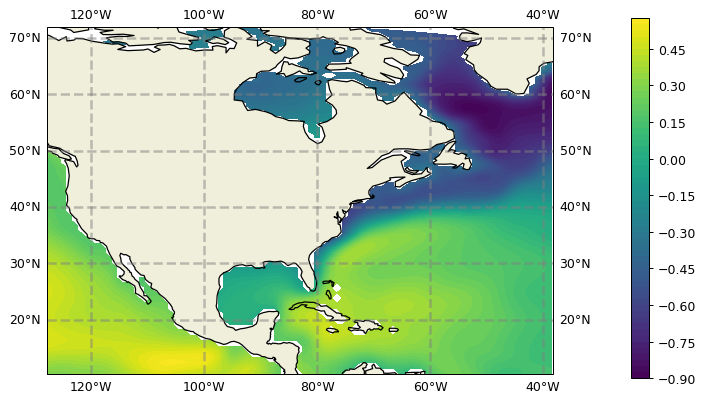

In [10]:
#plot SSH in tile 10 with grid
tile_num=10
time_ind=1

lons = ecco_ds.XC.isel(tile=tile_num)
lats = ecco_ds.YC.isel(tile=tile_num)

tile_to_plot = ecco_ds.SSH.isel(tile=tile_num, time=time_ind)
# mask to NaN where hFacC is == 0
# syntax is actually "keep where hFacC is not equal to zero"
#tile_to_plot= tile_to_plot.where(ecco_ds.hFacC.isel(tile=tile_num,k=0) !=0, np.nan)

fig = plt.figure(figsize=(10,5), dpi= 90)

# here is where you specify what projection you want to use
ax = plt.axes(projection=ccrs.PlateCarree())

# here is here you tell Cartopy that the projection
# of your 'x' and 'y' are geographic (lons and lats)
# and that you want to transform those lats and lons
# into 'x' and 'y' in the projection
cf = plt.contourf(lons, lats, tile_to_plot, 60,
                  transform=ccrs.PlateCarree());

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--');
ax.coastlines()
ax.add_feature(cfeature.LAND)

# add separate axes for colorbar (to ensure it doesn't overlap main plot)
cbar_ax = fig.add_axes([0.88,0.1,0.02,0.8])
plt.colorbar(cf,ax=ax,cax=cbar_ax)

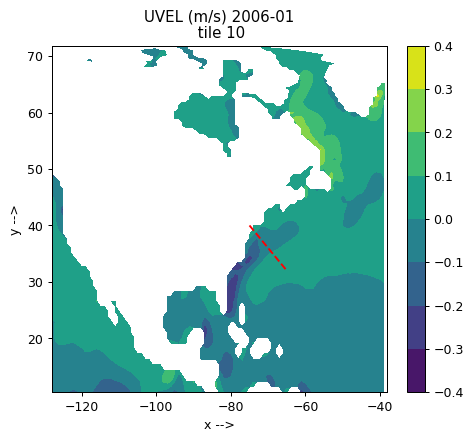

In [11]:
#plot UVEL in tile 10
plt.figure(figsize=(6,5), dpi= 90)

plt.contourf(ecco_grid.XG.isel(tile=10), ecco_grid.YC.isel(tile=10), ecco_ds.UVEL.isel(tile=10, time=0), origin='lower');

plt.colorbar()
plt.title('UVEL (m/s) ' + str(ecco_ds.time[0].values)[0:7] + '\n tile 10')
plt.xlabel('x -->')
plt.ylabel('y -->')

point1 = [-75, 40]
point2 = [-65, 32]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, linestyle="--", color = "red")

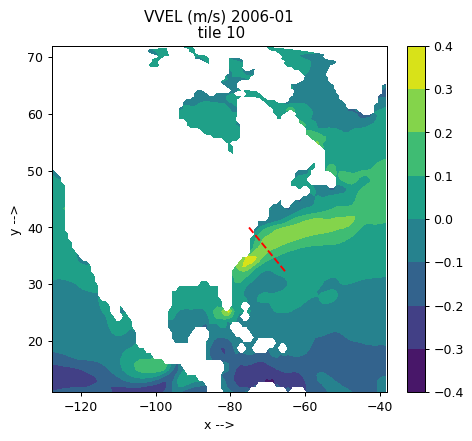

In [12]:
#plot VVEL in tile 10
plt.figure(figsize=(6,5), dpi= 90)

plt.contourf(ecco_grid.XC.isel(tile=10), ecco_grid.YG.isel(tile=10), ecco_ds.VVEL.isel(tile=10, time=0), origin='lower');

plt.colorbar()
plt.title('VVEL (m/s) ' + str(ecco_ds.time[0].values)[0:7] + '\n tile 10')
plt.xlabel('x -->')
plt.ylabel('y -->')

point1 = [-75, 40]
point2 = [-65, 32]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, linestyle="--", color = "red")

In [13]:
#get speed
XGCM_grid = ecco.get_llc_grid(ecco_ds)

import xgcm
xfld = ecco_ds.UVEL.isel(time=0)
yfld = ecco_ds.VVEL.isel(time=0)

velc = XGCM_grid.interp_2d_vector({'X': xfld, 'Y': yfld},boundary='fill')

# Compute the zonal and meridional vector components of oceTAUX and oceTAUY
VEL_E  = velc['X']*ecco_ds['CS'] - velc['Y']*ecco_ds['SN']
VEL_N  = velc['X']*ecco_ds['SN'] + velc['Y']*ecco_ds['CS']

SPEED = np.sqrt(VEL_E**2 + VEL_N**2)

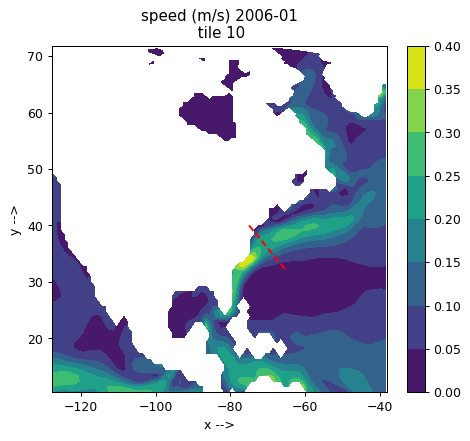

In [14]:
#plot VVEL in tile 10
plt.figure(figsize=(6,5), dpi= 90)

plt.contourf(ecco_grid.XC.isel(tile=10), ecco_grid.YC.isel(tile=10), SPEED.isel(tile=10), origin='lower');

plt.colorbar()
plt.title('speed (m/s) ' + str(ecco_ds.time[0].values)[0:7] + '\n tile 10')
plt.xlabel('x -->')
plt.ylabel('y -->')

point1 = [-75, 40]
point2 = [-65, 32]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values, linestyle="--", color = "red")